# IMPORTING LIBRARIES

In [40]:
# All the libraries used for this project

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.linear_model as lm
import sklearn.svm as sv 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score,f1_score,recall_score


#mutation.info()

# IMPORTING CSV AND CHECKING FOR CLASS IMBALANCE

Original Data shape (839, 23)
The shape of X_train is: (671, 23)
The shape of X_test is: (168, 23)
The shape of y_train is: (671,)
The shape of y_test is: (168,)
0    487
1    352
Name: Grade, dtype: int64


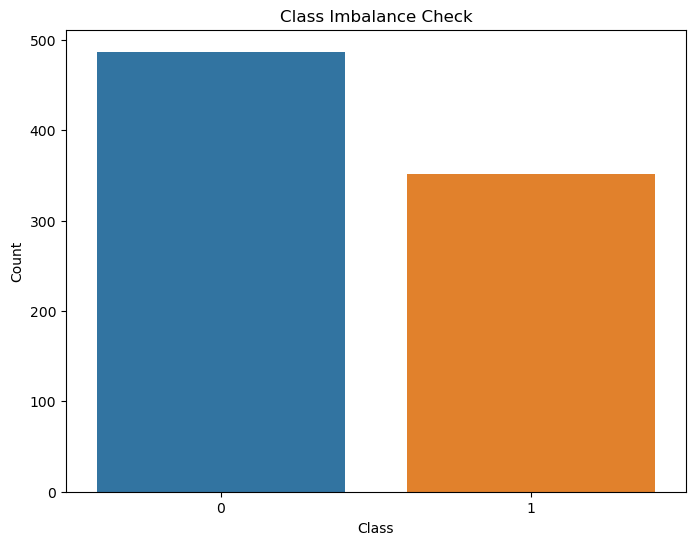

In [41]:
mutation = pd.read_csv('glioma.csv')


features = mutation.drop(columns=['Grade']) 
target = mutation['Grade']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#checking the shape of the different test and train parameters
print('Original Data shape', features.shape)
print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

# checking if the dataset has a balance class
class_counts = mutation['Grade'].value_counts()
print(class_counts)

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title('Class Imbalance Check')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

# DATA NORMALISATION/SCALING

Feature scaling is done to ensure that the age column is not contributing or giving too 
much importance in the training because it has large numbers

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Fit scaler on training data
scaler = MinMaxScaler()
# Transform training data
X_train = scaler.fit_transform(X_train)

# Transform testing data
X_test= scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)


(671, 23)
(168, 23)


# FEATURE REDUCTION USING PCA

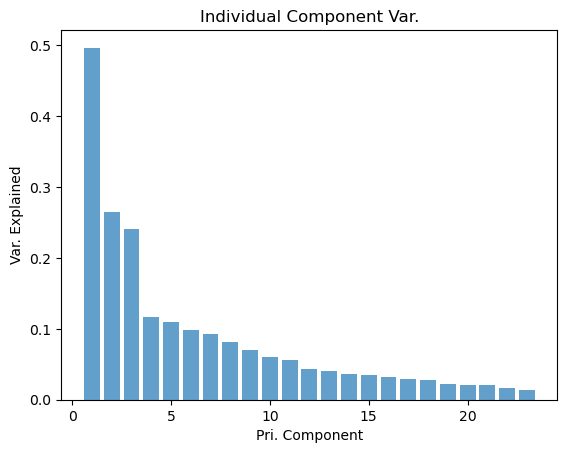

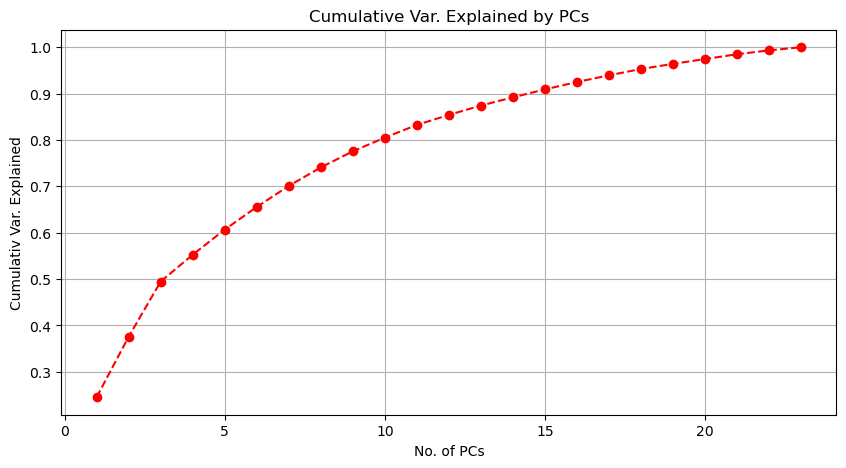

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# No feature reduction
pca = PCA()


X_train = pca.fit_transform(X_train)

# Individual component variance
ind_var = pca.explained_variance_

# Cumulative variance
cum_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot individual component variance
plt.figure()
plt.bar(range(1, len(ind_var) + 1), ind_var, alpha=0.7)
plt.xlabel('Pri. Component')
plt.ylabel('Var. Explained')
plt.title('Individual Component Var.')
plt.show()

# Plot cumulative variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cum_var_ratio) + 1), cum_var_ratio, marker='o', 
         linestyle='--', color='r')
plt.xlabel('No. of PCs')
plt.ylabel('Cumulativ Var. Explained')
plt.title('Cumulative Var. Explained by PCs')
plt.grid()
plt.show()

X_test = pca.transform(X_test)

#------------------------------------

# K NEAREST NEIGHBORS (KNN) ALGORITHM

<Figure size 640x480 with 0 Axes>

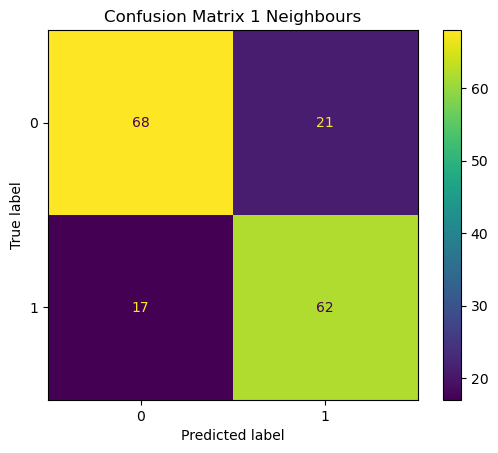

<Figure size 640x480 with 0 Axes>

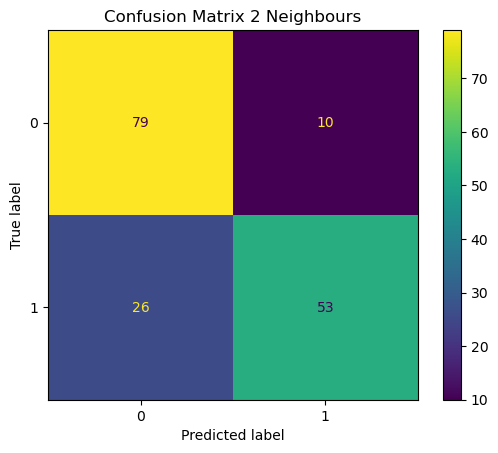

<Figure size 640x480 with 0 Axes>

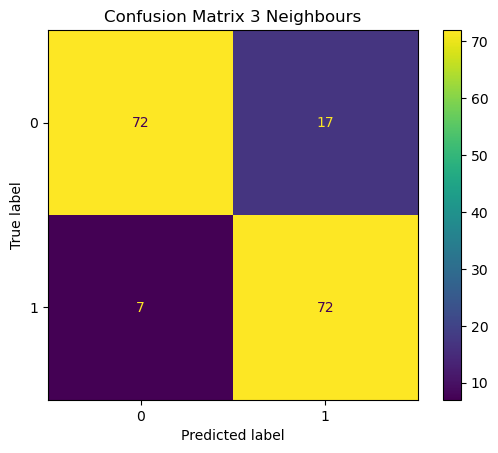

<Figure size 640x480 with 0 Axes>

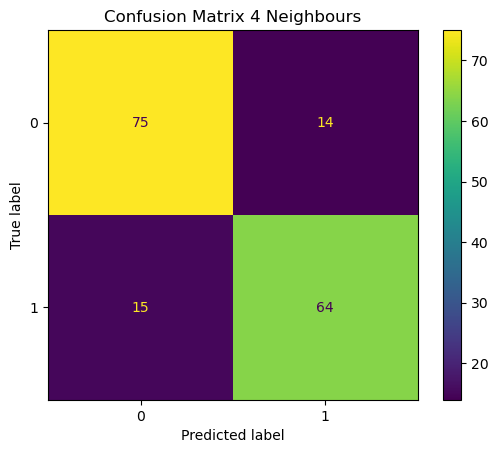

<Figure size 640x480 with 0 Axes>

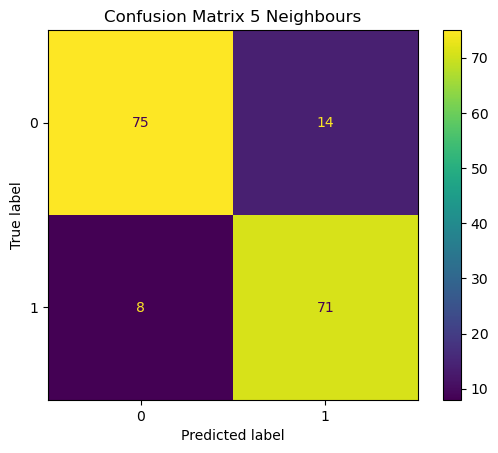

<Figure size 640x480 with 0 Axes>

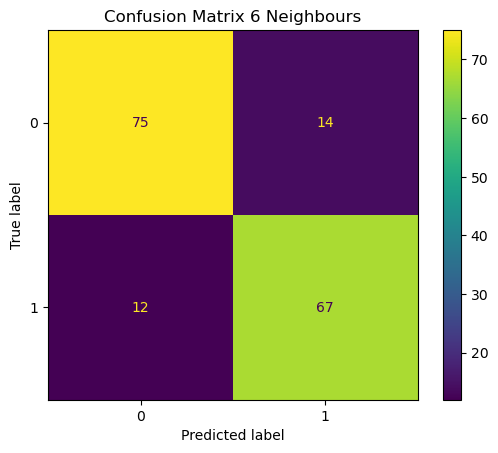

<Figure size 640x480 with 0 Axes>

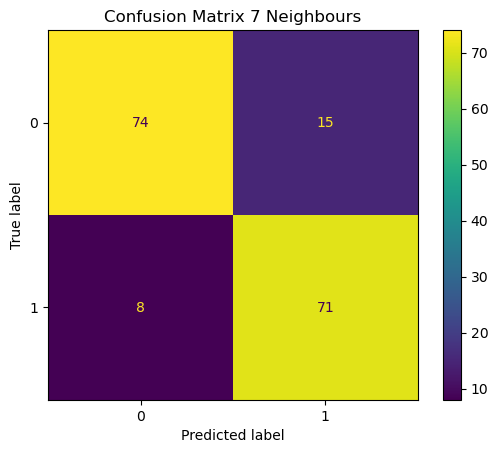

<Figure size 640x480 with 0 Axes>

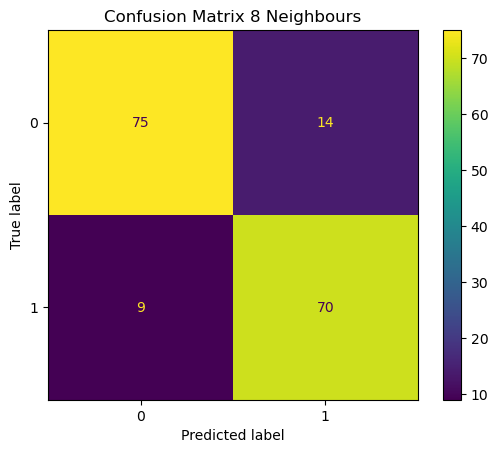

<Figure size 640x480 with 0 Axes>

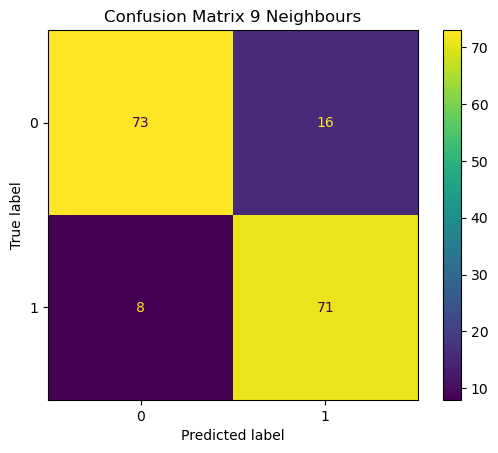

[0.7738095238095238, 0.7857142857142857, 0.8571428571428571, 0.8273809523809523, 0.8690476190476191, 0.8452380952380952, 0.8630952380952381, 0.8630952380952381, 0.8571428571428571]


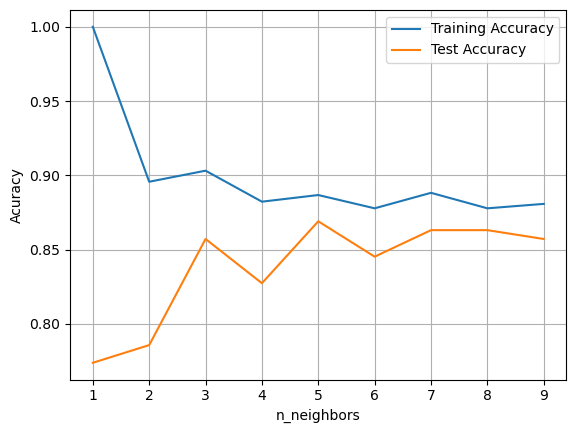

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
training_accuracy = []
test_accuracy = []


settings = range(1,10)
for n in settings:
    
    #building the model
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    #append training and generalisation accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
    #plotting confusion matrix for each n_neigbhour parameter
    predicted = knn.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    # Plot
    plt.figure()  
    met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    met.plot()
    plt.title(f'Confusion Matrix {n} Neighbours')
    plt.show()

plt.plot(settings, training_accuracy, label = 'Training Accuracy')
plt.plot(settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_neighbors')
plt.grid()
plt.legend()

#print(training_accuracy)
print(test_accuracy)


## PRECISION, SPECIFICITY AND SENSITIVITY FOR KNN

In [62]:
from sklearn.metrics import precision_score,f1_score,recall_score

# precision
precision = precision_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
# sensitivity
recall = recall_score(y_test, predicted)
print('precision is', precision)
print('f1_score is', f1)
print('recall_score is', recall)

# specificity
TN,FP,FN,TP = (metrics.confusion_matrix(y_test, predicted)).ravel()
specificity= TN/(TN+FP)
print('specificity is', specificity)

precision is 0.8160919540229885
f1_score is 0.8554216867469879
recall_score is 0.8987341772151899
specificity is 0.8202247191011236


# DECISION TREE ALGORITHM

<Figure size 640x480 with 0 Axes>

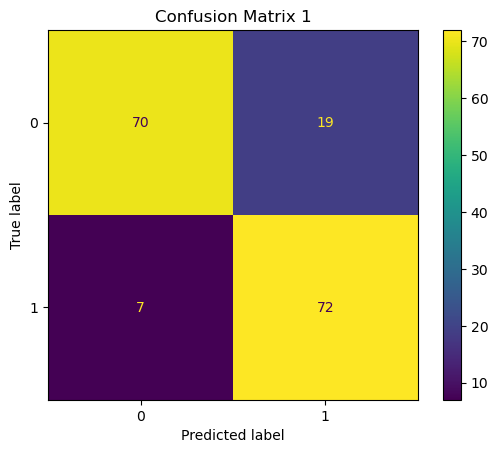

<Figure size 640x480 with 0 Axes>

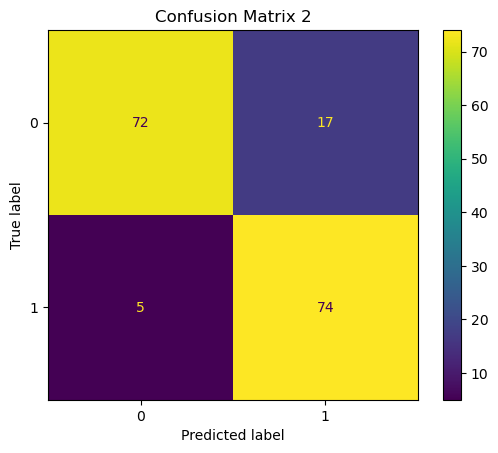

<Figure size 640x480 with 0 Axes>

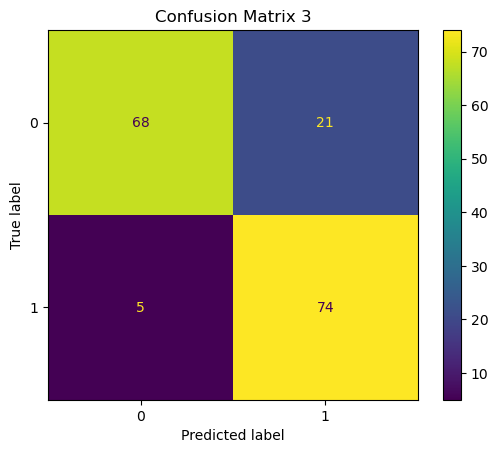

<Figure size 640x480 with 0 Axes>

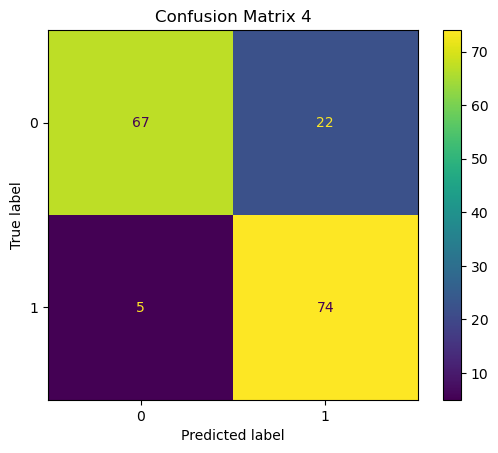

<Figure size 640x480 with 0 Axes>

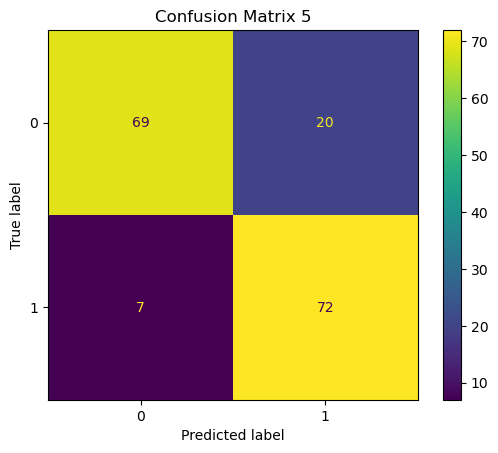

<Figure size 640x480 with 0 Axes>

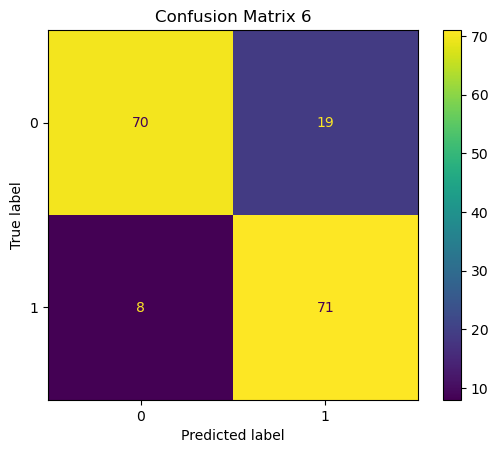

<Figure size 640x480 with 0 Axes>

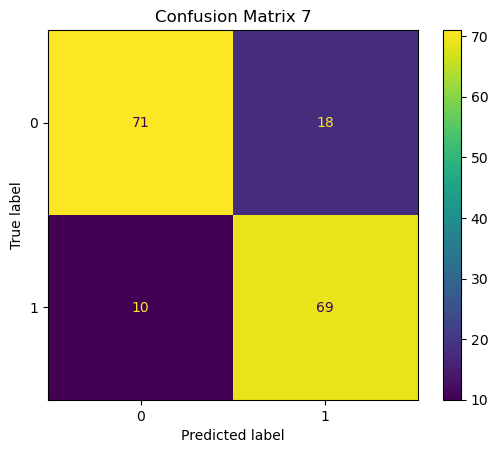

<Figure size 640x480 with 0 Axes>

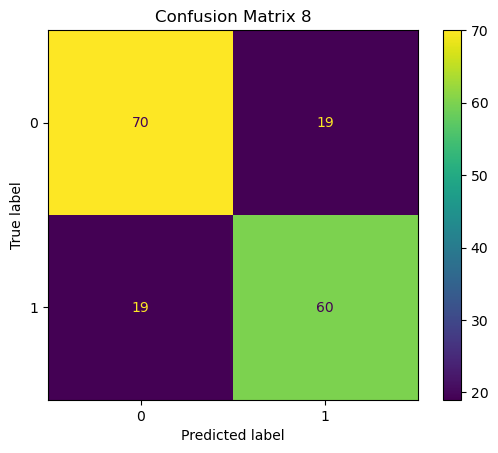

<Figure size 640x480 with 0 Axes>

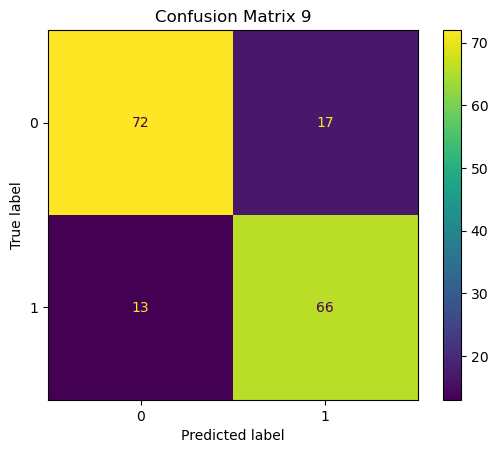

[0.8452380952380952, 0.8690476190476191, 0.8452380952380952, 0.8392857142857143, 0.8392857142857143, 0.8392857142857143, 0.8333333333333334, 0.7738095238095238, 0.8214285714285714]


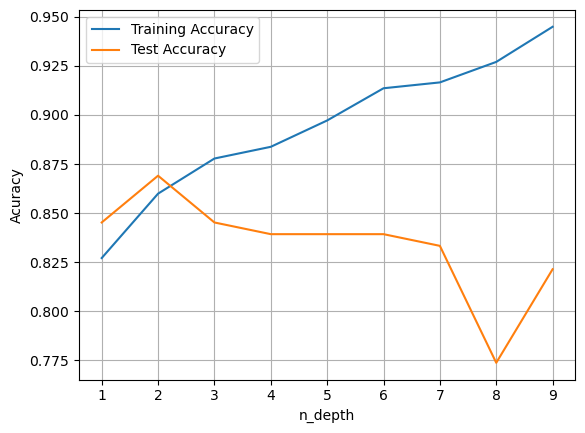

In [64]:
training_accuracy = []
test_accuracy = []
# try number of depths from 1 to 9

settings = range(1,10)
for n in settings:
    #building the model
    tree = DecisionTreeClassifier(max_depth=n, random_state=42)
    tree.fit(X_train, y_train)
    
    #record the training and test set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
    
   #plotting confusion matrix for each n_neigbhour parameter
    predicted = tree.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    # Plot
    plt.figure()  
    met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    met.plot()
    plt.title(f'Confusion Matrix {n}')
    plt.show()

plt.plot(settings, training_accuracy, label = 'Training Accuracy')
plt.plot(settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('n_depth')
plt.grid()
plt.legend()

print(test_accuracy)

## PRECISION, SPECIFICITY AND SENSITIVITY FOR DECISION TREE

In [65]:
# precision
precision = precision_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
# sensitivity
recall = recall_score(y_test, predicted)
print('precision is', precision)
print('f1_score is', f1)
print('recall_score is', recall)

# specificity
TN,FP,FN,TP = (metrics.confusion_matrix(y_test, predicted)).ravel()
specificity= TN/(TN+FP)
print('specificity is', specificity)

precision is 0.7951807228915663
f1_score is 0.8148148148148148
recall_score is 0.8354430379746836
specificity is 0.8089887640449438


# GRADIENT BOOSTING ALGORITHM

<Figure size 640x480 with 0 Axes>

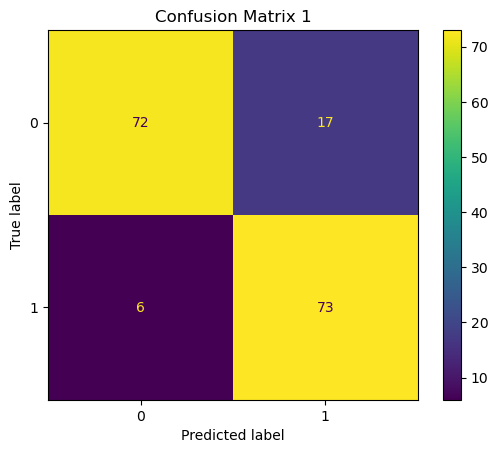

<Figure size 640x480 with 0 Axes>

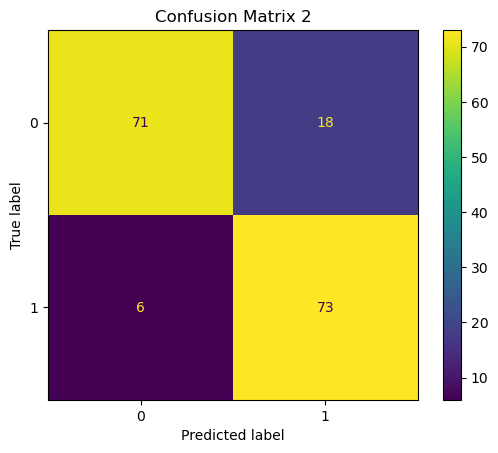

<Figure size 640x480 with 0 Axes>

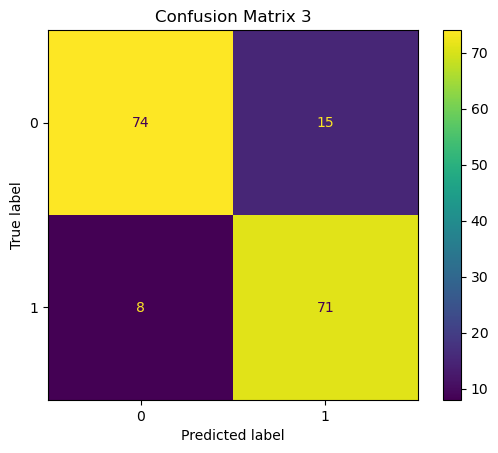

<Figure size 640x480 with 0 Axes>

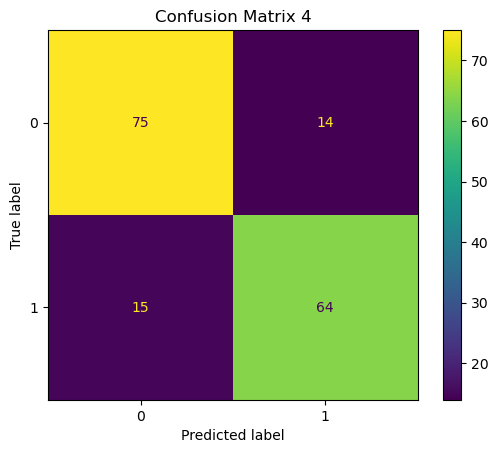

<Figure size 640x480 with 0 Axes>

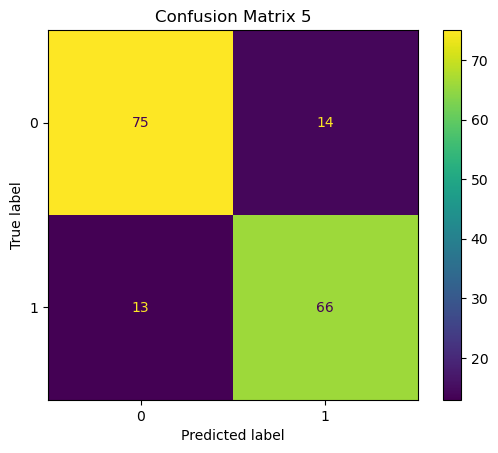

[0.8630952380952381, 0.8571428571428571, 0.8630952380952381, 0.8273809523809523, 0.8392857142857143]


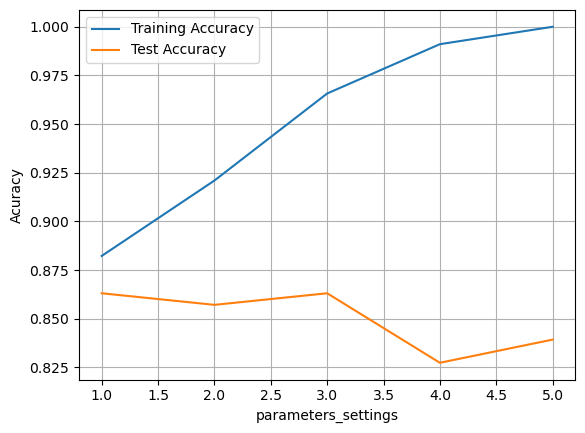

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
  
training_accuracy = []
test_accuracy = []


parameters_settings = range(1,6)
for n in parameters_settings:
    #building the model
    gbrt = GradientBoostingClassifier(max_depth=n, random_state=2)
    gbrt.fit(X_train, y_train)
    
    #record the training and test set accuracy
    training_accuracy.append(gbrt.score(X_train, y_train))
    test_accuracy.append(gbrt.score(X_test, y_test))
    
    #plotting confusion matrix for each n_parameter
    predicted = gbrt.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    # Plot
    plt.figure()  
    met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
    met.plot()
    plt.title(f'Confusion Matrix {n}')
    plt.show()

plt.plot(parameters_settings, training_accuracy, label = 'Training Accuracy')
plt.plot(parameters_settings, test_accuracy, label = 'Test Accuracy')
plt.ylabel('Acuracy'),
plt.xlabel('parameters_settings')
plt.grid()
plt.legend()

#print(training_accuracy)
print(test_accuracy)

## PRECISION, SPECIFICITY AND SENSITIVITY FOR DECISION TREE

In [68]:
# precision
precision = precision_score(y_test, predicted)
f1 = f1_score(y_test, predicted)
# sensitivity
recall = recall_score(y_test, predicted)
print('precision is', precision)
print('f1_score is', f1)
print('recall_score is', recall)

# specificity
TN,FP,FN,TP = (metrics.confusion_matrix(y_test, predicted)).ravel()
specificity= TN/(TN+FP)
print('specificity is', specificity)

precision is 0.825
f1_score is 0.8301886792452831
recall_score is 0.8354430379746836
specificity is 0.8426966292134831


## LOGISTIC REGRESSION

In [69]:
import sklearn.linear_model as lm

LR=lm.LogisticRegression(max_iter=200)
LR.fit(X_train,y_train)
ACC_tr=LR.score(X_train,y_train)
ACC_tes=LR.score(X_test,y_test)
print('Train Accuracy',ACC_tr)
print('Test Accuracy', ACC_tes)



Train Accuracy 0.8807749627421758
Test Accuracy 0.875


<Figure size 640x480 with 0 Axes>

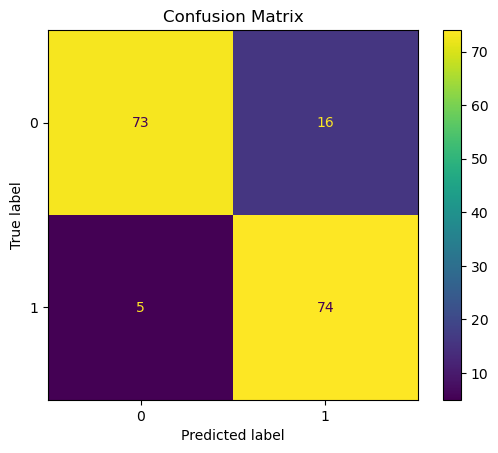

In [70]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = LR.predict(X_test)
#print(y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)
plt.figure()  
met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
met.plot()
plt.title('Confusion Matrix')
plt.show()

## PRECISION, SPECIFICITY AND SENSITIVITY FOR DECISION TREE

In [72]:
# precision
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# sensitivity
recall = recall_score(y_test, y_pred)
print('precision is', precision)
print('f1_score is', f1)
print('recall_score is', recall)

# specificity
TN,FP,FN,TP = (metrics.confusion_matrix(y_test, predicted)).ravel()
specificity= TN/(TN+FP)
print('specificity is', specificity)

precision is 0.8222222222222222
f1_score is 0.8757396449704142
recall_score is 0.9367088607594937
specificity is 0.8426966292134831


In [73]:
import sklearn.svm as sv 

# SVM classification
clsfi=sv.SVC(kernel='rbf')
clsfi.fit(X_train,y_train)
Acc_tr=clsfi.score(X_train,y_train)
Acc_tes=clsfi.score(X_test,y_test)
print('Train Accuracy=',Acc_tr)
print('Test Accuracy=',Acc_tes)

Train Accuracy= 0.8897168405365127
Test Accuracy= 0.8690476190476191


<Figure size 640x480 with 0 Axes>

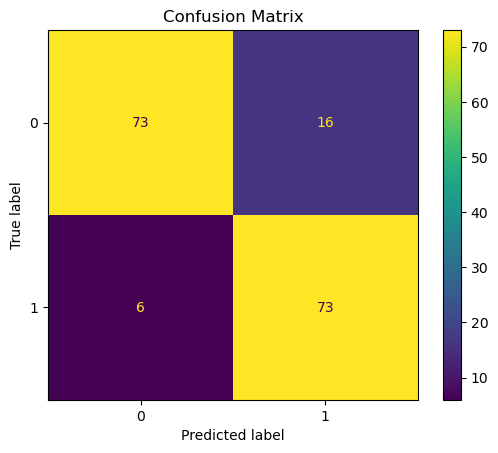

In [74]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = clsfi.predict(X_test)
#print(y_pred)
confusion_matrix=confusion_matrix(y_test, y_pred)
plt.figure()  
met = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1])
met.plot()
plt.title('Confusion Matrix')
plt.show()

## PRECISION, SPECIFICITY AND SENSITIVITY FOR DECISION TREE

In [75]:
# precision
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# sensitivity
recall = recall_score(y_test, y_pred)
print('precision is', precision)
print('f1_score is', f1)
print('recall_score is', recall)

# specificity
TN,FP,FN,TP = (metrics.confusion_matrix(y_test, predicted)).ravel()
specificity= TN/(TN+FP)
print('specificity is', specificity)

precision is 0.8202247191011236
f1_score is 0.8690476190476191
recall_score is 0.9240506329113924
specificity is 0.8426966292134831
